In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

#input, times weight, add a bias, activate 

In [2]:
# CONSTANTS

In [3]:
num_inputs = 2

In [4]:
num_neurons = 3 

In [5]:
# PLACEHOLDERS 

In [6]:
x0 = tf.placeholder(tf.float32, [None, num_inputs])

In [7]:
x1 = tf.placeholder(tf.float32, [None, num_inputs])

In [8]:
# VARIABLES 

In [9]:
Wx = tf.Variable(tf.random_normal(shape=[num_inputs, num_neurons]))

In [10]:
Wy = tf.Variable(tf.random_normal(shape=[num_neurons, num_neurons]))

In [11]:
b = tf.Variable(tf.zeros([1,num_neurons]))

In [12]:
# GRAPHS 

In [13]:
y0 = tf.tanh(tf.matmul(x0,Wx) + b)

In [14]:
y1 = tf.tanh(tf.matmul(y0,Wy) + tf.matmul(x1,Wx) + b)

In [15]:
init = tf.global_variables_initializer()

In [16]:
# CREATE DATA

In [17]:
#t=0
x0_batch = np.array([[0,1], [2,3], [4,5]])

#t=1
x1_batch = np.array([[100,101], [102,103], [104,105]])


In [18]:
with tf.Session() as sess:
    
    sess.run(init)
    
    y0_output_vals , y1_output_vals = sess.run([y0,y1], feed_dict={x0:x0_batch, x1:x1_batch})

In [19]:
y0_output_vals

array([[-0.52767223,  0.48457235, -0.63475835],
       [-0.96961391,  0.78340238, -0.8923862 ],
       [-0.9984616 ,  0.9184916 , -0.97146499]], dtype=float32)

In [20]:
y1_output_vals

array([[-1.,  1., -1.],
       [-1.,  1., -1.],
       [-1.,  1., -1.]], dtype=float32)

In [21]:
Wx

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32_ref>

# Vanishing Gradients: LSTM and GRU 

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plot
%matplotlib inline

In [23]:
class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        # Grab random starting point for each batch 
        rand_start = np.random.rand(batch_size,1)
        
        # Convert to be on time series
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        
        # Create batch time series on the x axis 
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        # Create the Y data for the time series x axis from previous step 
        y_batch = np.sin(batch_ts)
        
        # FORMATTING for  RNN 
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1) , batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:].reshape(-1,steps,1)
        

In [24]:
ts_data = TimeSeriesData(250,0,10)

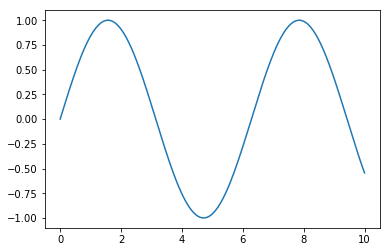

In [25]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [26]:
num_time_steps = 30

In [51]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

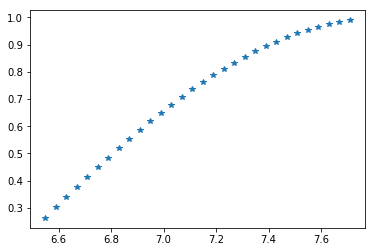

In [52]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

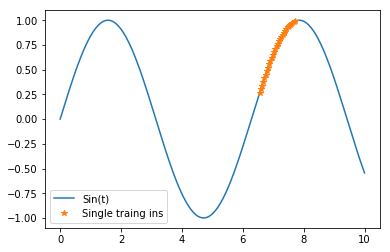

In [53]:
plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*', label='Single traing ins')

plt.legend()

# Training data

In [54]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps+1),num_time_steps+1)

In [55]:
train_inst

array([ 5.        ,  5.04133333,  5.08266667,  5.124     ,  5.16533333,
        5.20666667,  5.248     ,  5.28933333,  5.33066667,  5.372     ,
        5.41333333,  5.45466667,  5.496     ,  5.53733333,  5.57866667,
        5.62      ,  5.66133333,  5.70266667,  5.744     ,  5.78533333,
        5.82666667,  5.868     ,  5.90933333,  5.95066667,  5.992     ,
        6.03333333,  6.07466667,  6.116     ,  6.15733333,  6.19866667,
        6.24      ])

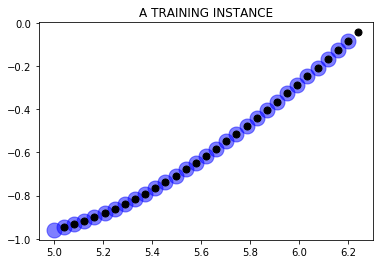

In [57]:
plt.title('A TRAINING INSTANCE')

plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), 'bo', markersize=15, alpha=0.5, label='instance')

plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]),'ko',markersize=7,label='Target')